# Rossman dataset

In [1]:
# importing libraries
import datetime as dt
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
# load datasets
rossman_train = pd.read_csv("data/train.csv", low_memory=False)
rossman_stores = pd.read_csv("data/store.csv", low_memory=False)

In [3]:
# show all the columns when using method df.head()
pd.set_option('display.max_columns',50)

# Get to know to the data

## Train dataset

Let's examine `train.csv`

In [4]:
# train dimensions
print('Dimensions of train.csv:')
print(f' Number of rows: {rossman_train.shape[0]}')
print(f' Number of columns: {rossman_train.shape[1]}')
print()

Dimensions of train.csv:
 Number of rows: 637774
 Number of columns: 9



In [5]:
# column names 
list(rossman_train.columns)

['Date',
 'Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [6]:
# examine first lines of train
rossman_train.head(3)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0


In [7]:
# convert object column to datetime format    
rossman_train['Date'] = pd.to_datetime(rossman_train['Date']) 

In [8]:
# show some descriptive statistics
rossman_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,618473.000000,618757.000000,618747.000000,618683.000000,618588.000000,618580.000000,618437.000000
mean,558.105623,3.994914,5668.015834,628.909831,0.829167,0.370447,0.173253
std,321.885545,1.997485,3809.655137,463.786905,0.376363,0.482925,0.378466
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,2.000000,3640.000000,397.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5625.000000,604.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,7714.000000,833.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,38037.000000,7388.000000,1.000000,1.000000,1.000000


In [9]:
# show general info
rossman_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637774 entries, 0 to 637773
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           637774 non-null  datetime64[ns]
 1   Store          618473 non-null  float64       
 2   DayOfWeek      618757 non-null  float64       
 3   Sales          618747 non-null  float64       
 4   Customers      618683 non-null  float64       
 5   Open           618588 non-null  float64       
 6   Promo          618580 non-null  float64       
 7   StateHoliday   618520 non-null  object        
 8   SchoolHoliday  618437 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 43.8+ MB


In [10]:
# separate numeric from categorical data
numeric_data = rossman_train.select_dtypes(include=[np.number])
categorical_data = rossman_train.select_dtypes(exclude=[np.number])

print(f' Number of numeric features: {numeric_data.shape[1]}\n Number of categorical features: {categorical_data.shape[1]}')

 Number of numeric features: 7
 Number of categorical features: 2


In [11]:
# show unique values
for col in rossman_train.columns:
    print(f'{col: >21}: {rossman_train[col].nunique()}') 

                 Date: 577
                Store: 1115
            DayOfWeek: 7
                Sales: 19953
            Customers: 3867
                 Open: 2
                Promo: 2
         StateHoliday: 4
        SchoolHoliday: 2


In [12]:
# total number of null values if they are present
print('Features with missing values:\n')
rossman_train.isnull().sum()[rossman_train.isnull().sum() > 0]

Features with missing values:



Store            19301
DayOfWeek        19017
Sales            19027
Customers        19091
Open             19186
Promo            19194
StateHoliday     19254
SchoolHoliday    19337
dtype: int64

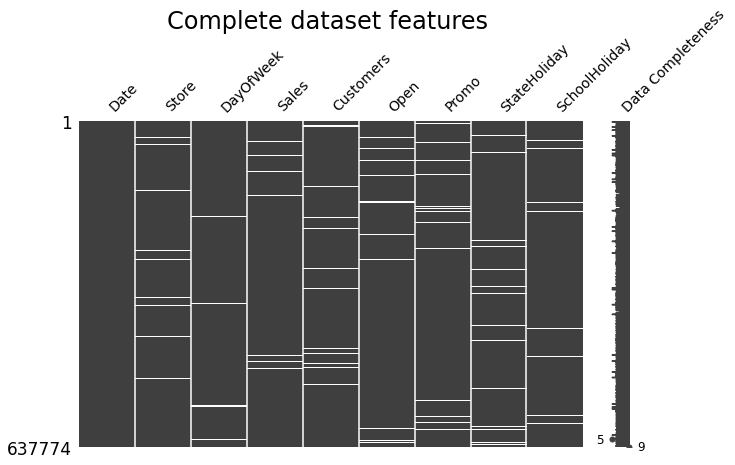

In [13]:
# visualize missing value matrix for the complete dataset
msno.matrix(rossman_train, labels=True, fontsize=14, figsize=(10,6))
plt.title("Complete dataset features ", fontsize=24)
plt.show()

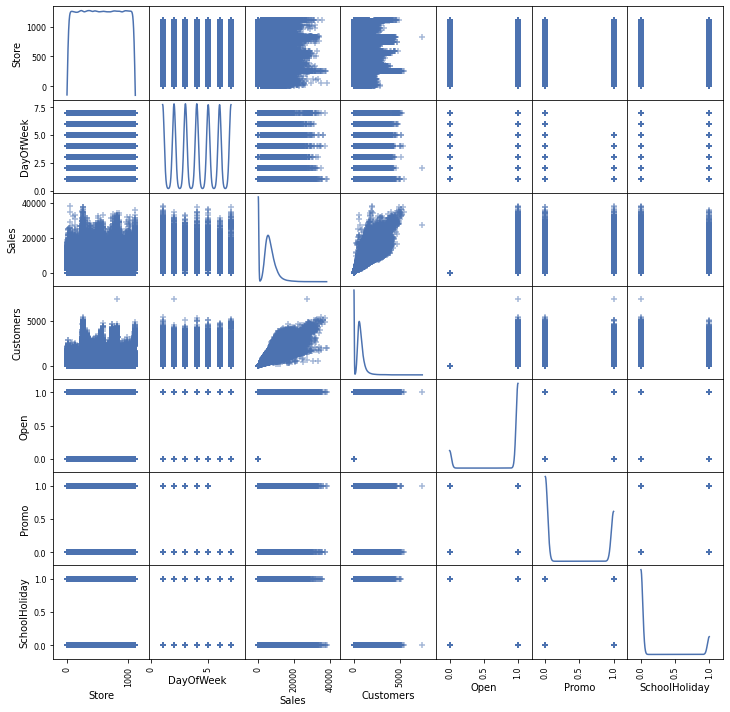

In [14]:
# visualize the dataset
plt.style.use('seaborn-deep')
scatter_matrix(rossman_train, diagonal='kde', range_padding=0.4, marker='+', figsize=(12,12))
plt.show()

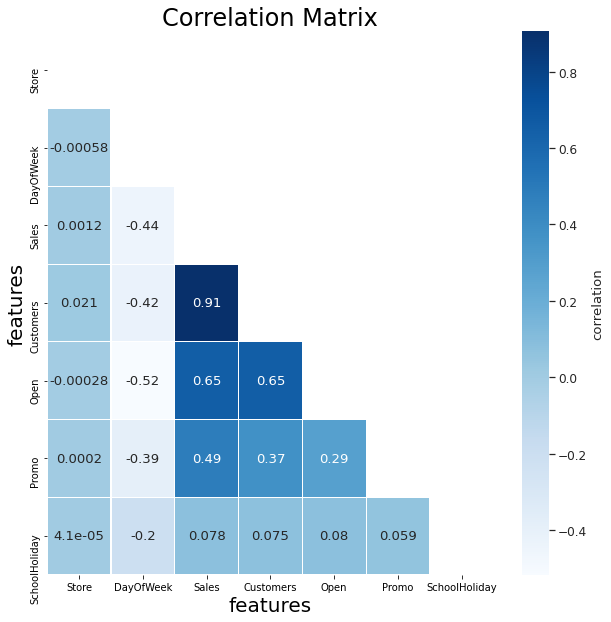

In [15]:
# Correlation matrix completely ignores any non-numeric column. 
fig, ax = plt.subplots(figsize=(10,10))

matrix = np.triu(rossman_train.corr('spearman'))
sns.set(font_scale=1.1)
sns.heatmap(rossman_train.corr(method='spearman'), linewidth= 0.1, annot=True, cmap='Blues', cbar_kws={'label': 'correlation'}, mask=matrix)
plt.xlabel("features", size=20)
plt.ylabel("features", size=20)
plt.title("Correlation Matrix", size=24)
plt.show()

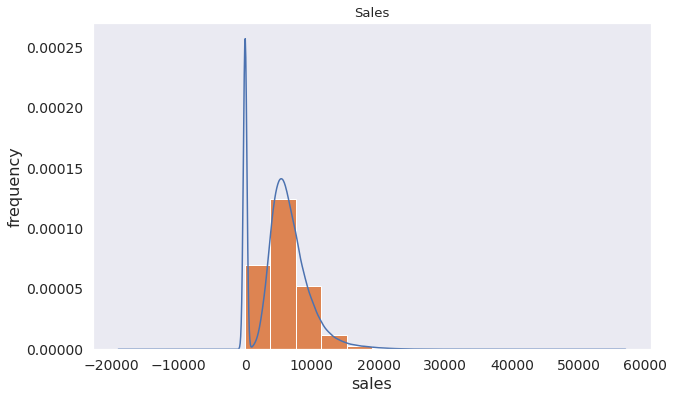

In [16]:
# distribution of sales
fig, ax = plt.subplots(figsize=(10,6))

dist = rossman_train['Sales']
dist.plot.kde(ax=ax, legend=False, title='Sales')
dist.plot.hist(density=True, ax=ax, fontsize=14)
ax.set_ylabel('frequency',size=16)
ax.set_xlabel('sales', size=16)
plt.grid()

plt.show()

## Store dataset

Let's examine `store.csv`

In [17]:
# store dimensions
print('Dimensions of store.csv:')
print(f' Number of rows: {rossman_stores.shape[0]}')
print(f' Number of columns: {rossman_stores.shape[1]}')

Dimensions of store.csv:
 Number of rows: 1115
 Number of columns: 10


In [18]:
# column names 
list(rossman_stores.columns)

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [19]:
# examine first lines of store
rossman_stores.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [20]:
# show some descriptive statistics
rossman_stores.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [21]:
# show general info
rossman_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [22]:
# separate numeric from categorical data
numeric_data = rossman_stores.select_dtypes(include=[np.number])
categorical_data = rossman_stores.select_dtypes(exclude=[np.number])

print(f' Number of numeric features: {numeric_data.shape[1]}\n Number of categorical features: {categorical_data.shape[1]}')

 Number of numeric features: 7
 Number of categorical features: 3


In [23]:
# show unique values
for col in rossman_stores.columns:
    print(f'{col: >21}: {rossman_stores[col].nunique()}') 

                Store: 1115
            StoreType: 4
           Assortment: 3
  CompetitionDistance: 654
CompetitionOpenSinceMonth: 12
CompetitionOpenSinceYear: 23
               Promo2: 2
      Promo2SinceWeek: 24
      Promo2SinceYear: 7
        PromoInterval: 3


In [24]:
# total number of null values if they are present
print('Features with missing values:\n')
rossman_stores.isnull().sum()[rossman_stores.isnull().sum() > 0]

Features with missing values:



CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

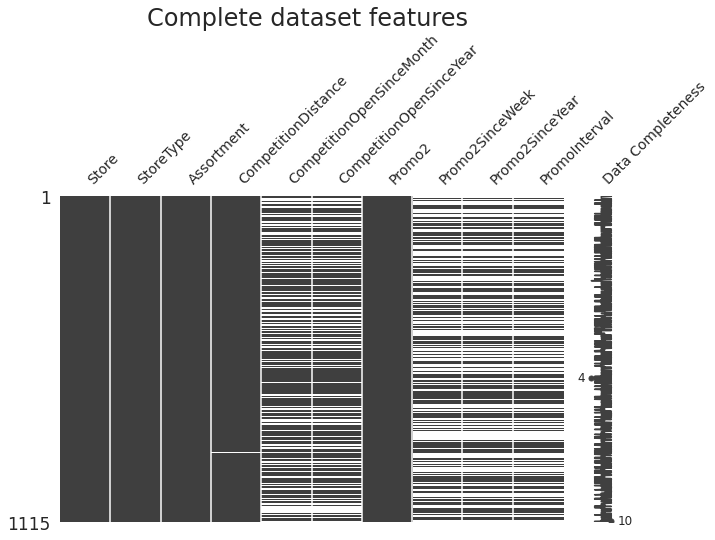

In [25]:
# visualize missing value matrix for the complete dataset
msno.matrix(rossman_stores, labels=True, fontsize=14, figsize=(10,6))
plt.title("Complete dataset features ", fontsize=24)
plt.show()

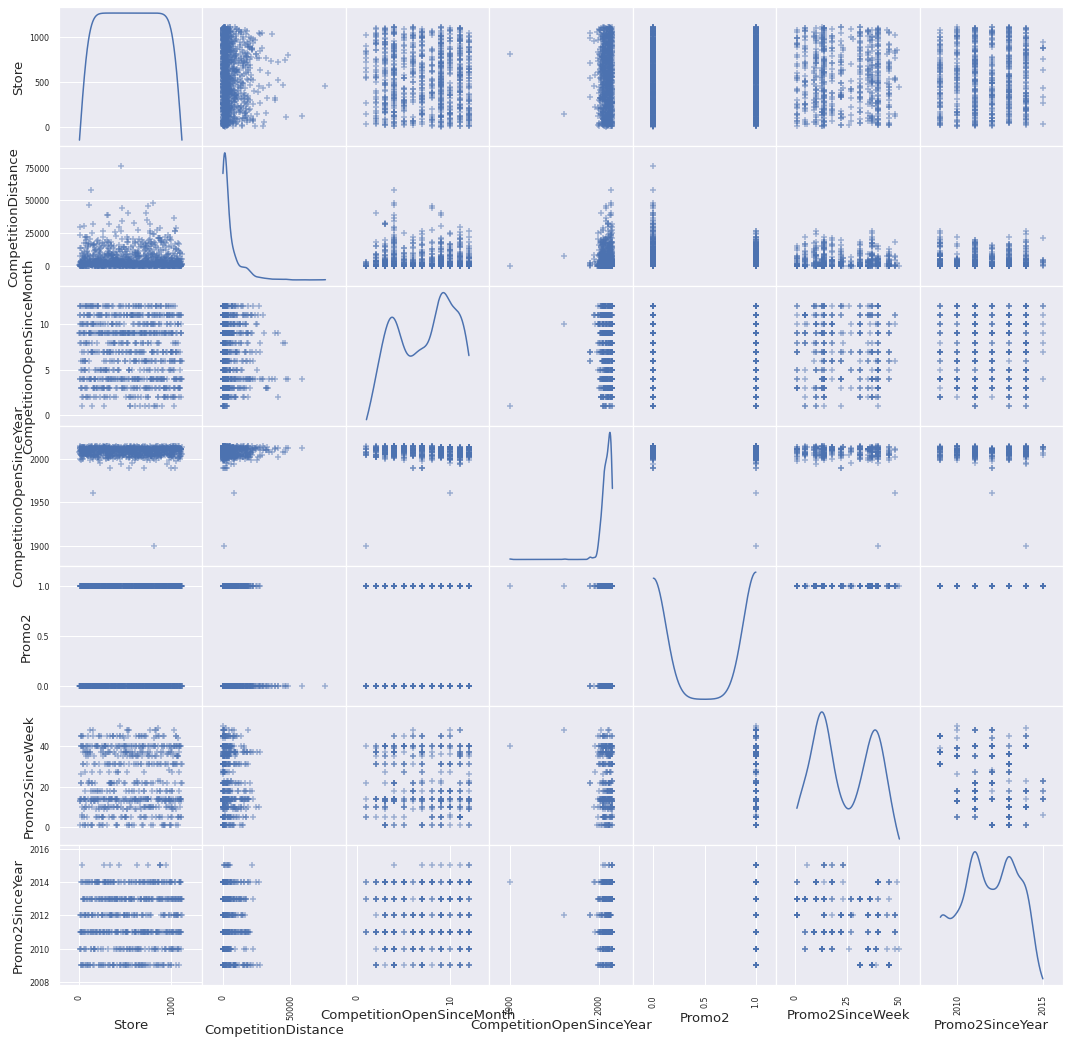

In [26]:
# visualize the dataset
plt.style.use('seaborn-deep')
scatter_matrix(rossman_stores, diagonal='kde', range_padding=0.4, marker='+', figsize=(18,18))
plt.show()

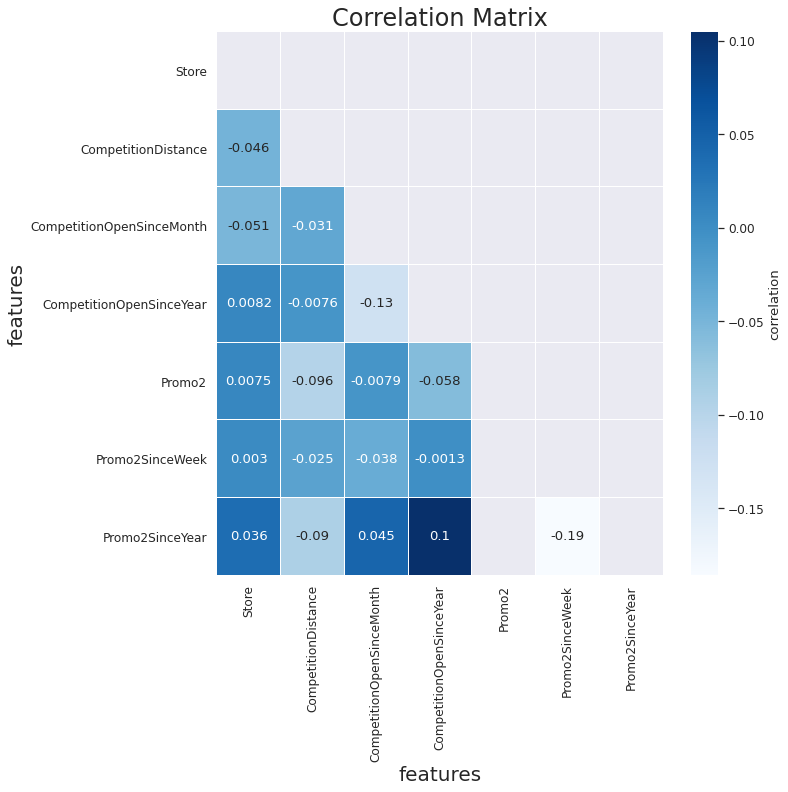

In [27]:
# Correlation matrix completely ignores any non-numeric column. 
fig, ax = plt.subplots(figsize=(10,10))

matrix = np.triu(rossman_stores.corr('spearman'))
sns.set(font_scale=1.1)
sns.heatmap(rossman_stores.corr(method='spearman'), linewidth= 0.1, annot=True, cmap='Blues', cbar_kws={'label': 'correlation'}, mask=matrix)
plt.xlabel("features", size=20)
plt.ylabel("features", size=20)
plt.title("Correlation Matrix", size=24)
plt.show()

## Merging train and stores datasets

In [28]:
# merging both data files
rossman_train['Store'] = rossman_train['Store'].fillna(0)
rossman_train['Store'] = rossman_train['Store'].astype(int)
#rossman_merged = pd.merge(rossman_train, rossman_stores, on="Store", how='left') # Stores with nan values are included
rossman_merged = pd.merge(rossman_train, rossman_stores, on="Store") 

In [29]:
rossman_merged.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2013-01-01,1115,2.0,0.0,0.0,0.0,0.0,a,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1,2013-01-02,1115,3.0,3697.0,305.0,1.0,0.0,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
2,2013-01-03,1115,4.0,4297.0,300.0,1.0,0.0,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
3,2013-01-04,1115,5.0,4540.0,326.0,1.0,0.0,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
4,2013-01-05,1115,6.0,4771.0,339.0,1.0,0.0,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [30]:
# dimensions
rossman_merged.shape

(618473, 18)

In [31]:
# total number of null values if they are present
print('Features with missing values:\n')
rossman_merged.isnull().sum()[rossman_merged.isnull().sum() > 0]

Features with missing values:



DayOfWeek                     18437
Sales                         18445
Customers                     18516
Open                          18641
Promo                         18682
StateHoliday                  18600
SchoolHoliday                 18787
CompetitionDistance            1635
CompetitionOpenSinceMonth    196430
CompetitionOpenSinceYear     196430
Promo2SinceWeek              303645
Promo2SinceYear              303645
PromoInterval                303645
dtype: int64

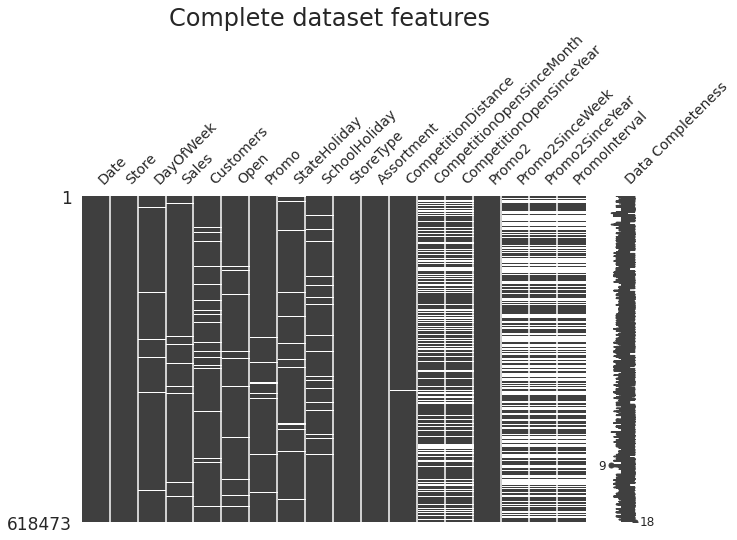

In [32]:
# visualize missing value matrix for the complete dataset
msno.matrix(rossman_merged, labels=True, fontsize=14, figsize=(10,6))
plt.title("Complete dataset features ", fontsize=24)
plt.show()

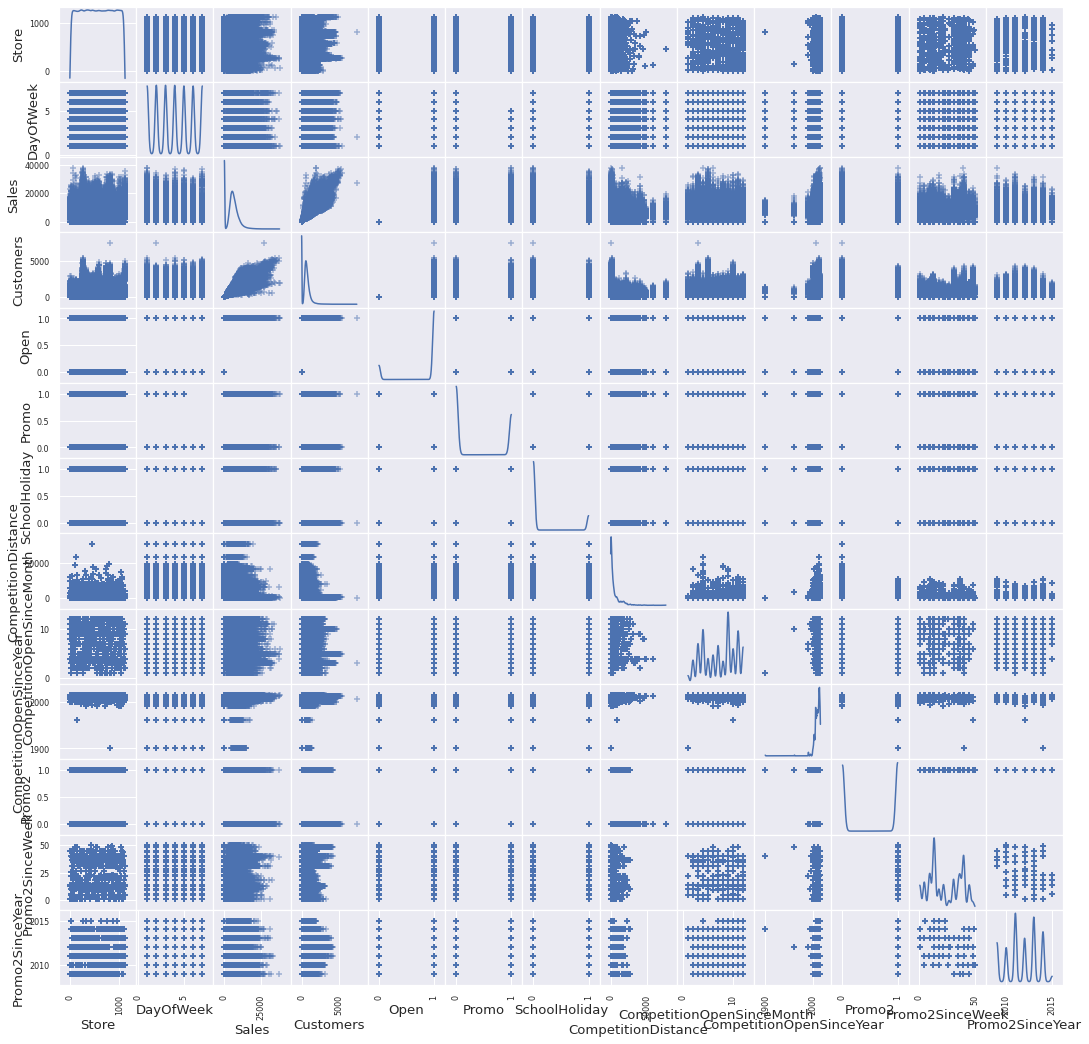

In [33]:
# visualize the dataset
plt.style.use('seaborn-deep')
scatter_matrix(rossman_merged, diagonal='kde', range_padding=0.4, marker='+', figsize=(18,18))

plt.show()

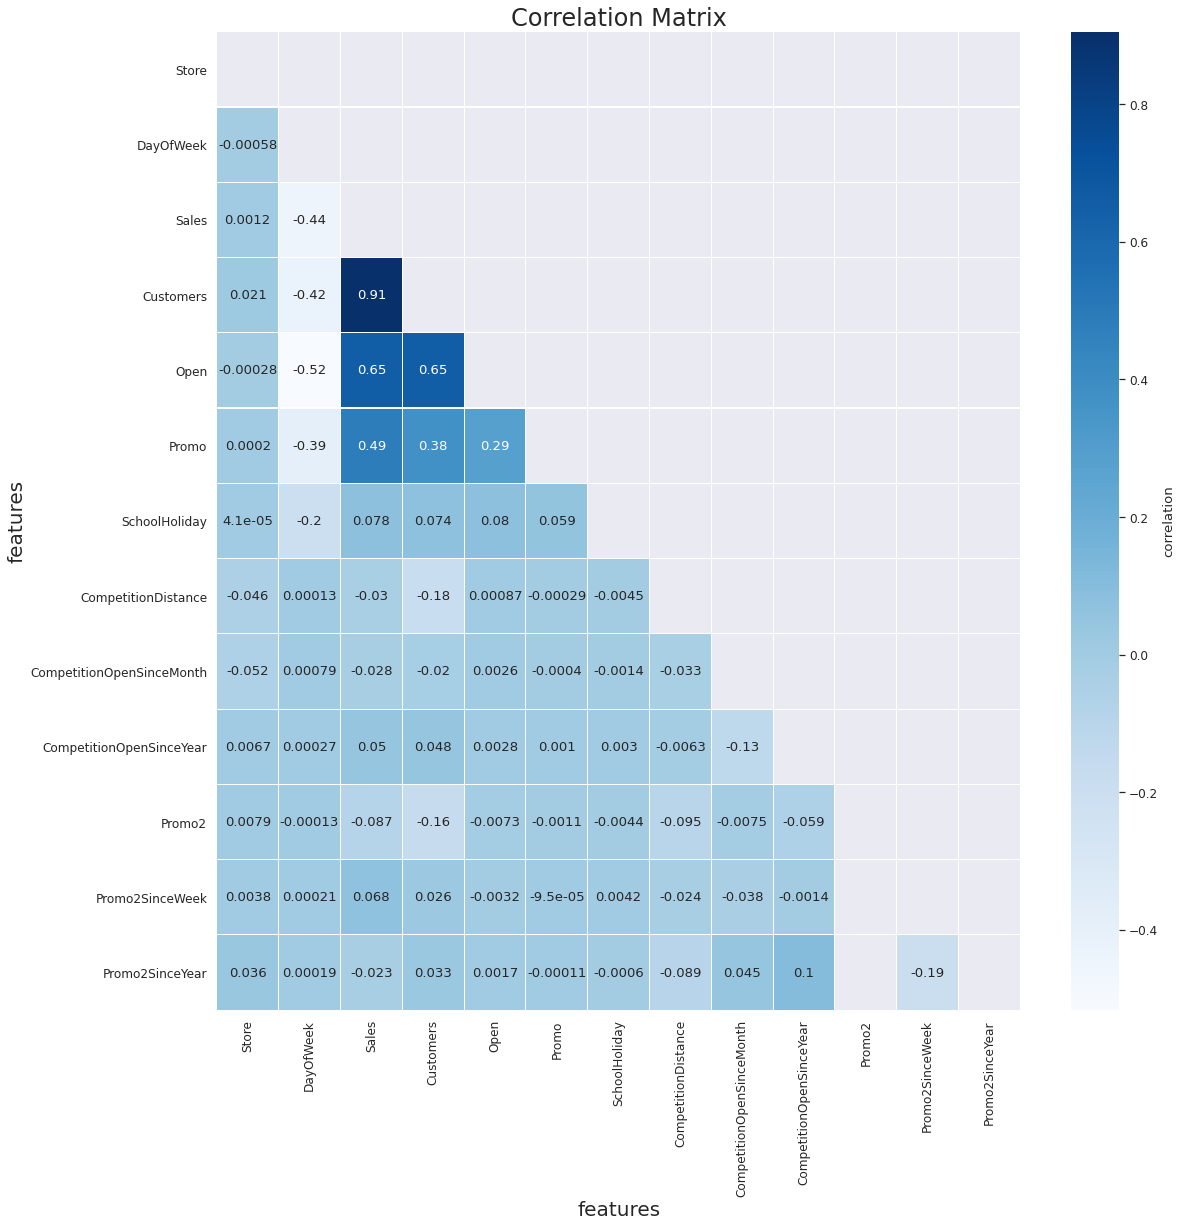

In [34]:
# Correlation matrix completely ignores any non-numeric column. 
fig, ax = plt.subplots(figsize=(18, 18))

matrix = np.triu(rossman_merged.corr('spearman'))
sns.set(font_scale=1.1)
sns.heatmap(rossman_merged.corr(method='spearman'), linewidth= 0.1, annot=True, cmap='Blues', cbar_kws={'label': 'correlation'}, mask=matrix)
plt.xlabel("features", size=20)
plt.ylabel("features", size=20)
plt.title("Correlation Matrix", size=24)
plt.show()

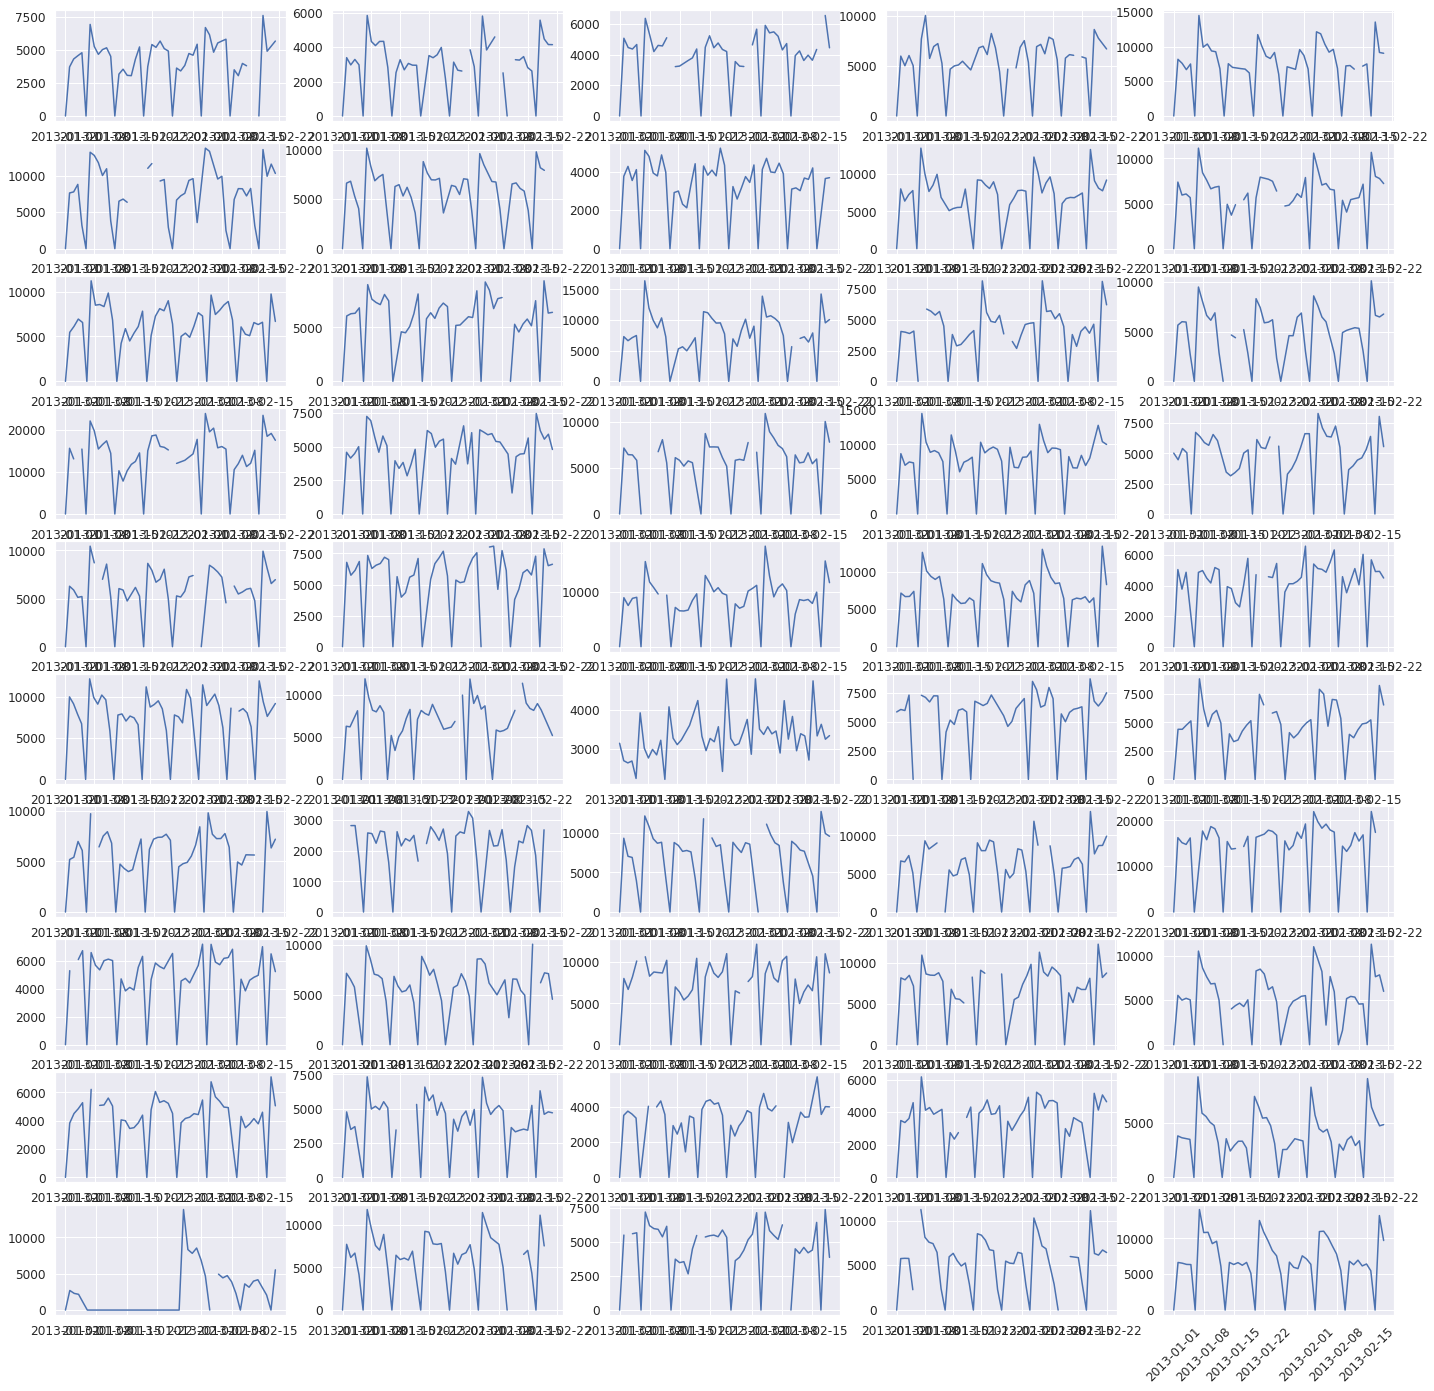

In [35]:
# showing sales per store per date
n_rows = 10
n_cols = 5
offset = 0

merged_df = rossman_merged.copy()

store_ids = merged_df.Store.unique()
fig, axs = plt.subplots(n_rows, n_cols, figsize=(24, 24)) #, sharex=True)

merged_df[merged_df["Sales"]>0]

plt.xticks(rotation=45)  # just applies
for row in range(n_rows):
    for col in range(n_cols):
        store_id = store_ids[offset + row * n_cols + col]
        store_sales_df = merged_df[merged_df["Store"]==store_id]
        # axs[row, col].plot(store_sales_df.loc[:50, 'Date'], store_sales_df.loc[:50, "Sales"])
        axs[row, col].plot(store_sales_df['Date'][:50], store_sales_df["Sales"][:50])
plt.show()